In [ ]:
import os
import pandas as pd

# data 폴더 경로
folder_path = "dataset/"

# 폴더 내 모든 xlsx 파일 목록 가져오기
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# 모든 엑셀 파일을 읽어와 병합
df_list = [pd.read_excel(os.path.join(folder_path, file)) for file in file_list]

# 행 병합
merged_df = pd.concat(df_list, ignore_index=True)
unique_items = merged_df['품목'].unique()
print(unique_items)
# 결과 확인
merged_df


['녹두' '호박' '고추' '깐마늘(국산)' '부추' '브로콜리' '감귤' '팥' '풋고추' '바나나' '생강' '땅콩' '딸기'
 '참깨' '갓' '건포도' '참외' '시금치' '파' '수박' '갈치' '느타리버섯' '아보카도' '양파' '깻잎' '호두'
 '열무' '파프리카' '건블루베리' '상추' '배추' '방울토마토' '콩' '체리' '복숭아' '배' '팽이버섯' '오렌지'
 '멜론' '아몬드' '망고' '포도' '건고추' '양배추' '토마토' '단감' '자몽' '피망' '참다래' '가지' '사과'
 '미나리' '피마늘' '새송이버섯' '메밀' '레몬' '오이' '콩나물' '파인애플' '당근' '무' '감자' '고구마']


,DATE,품목,품종,거래단위,등급,평균가격,전년,평년
0,202502중순,녹두,국산,40kg,상품,562500,524125,583722.333333
1,202502중순,녹두,국산,40kg,중품,476500,0,0
2,202502중순,녹두,녹두(전체),40kg,상품,-,-,-
3,202502중순,녹두,녹두(전체),40kg,중품,-,-,-
4,202502중순,녹두,수입,40kg,중품,215000,229600,225172.333333
...,...,...,...,...,...,...,...,...
162506,202501중순,고구마,밤,10kg,중품,26987,28900,26767.666667
162507,202501하순,고구마,고구마(전체),10kg,상품,-,-,-
162508,202501하순,고구마,고구마(전체),10kg,중품,-,-,-
162509,202501하순,고구마,밤,10kg,상품,34592,34033,31668


In [4]:
import numpy as np

# '0'과 '-'를 NaN으로 변환
merged_df.replace(['0', 0, '-'], np.nan, inplace=True)

# 평균가격 열 로그 변환 (NaN은 변환하지 않음)
merged_df['평균가격'] = np.log(merged_df['평균가격'].astype(float))

# 결과 확인
merged_df


C:\Users\user\AppData\Local\Temp\ipykernel_33240\2814482166.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df.replace(['0', 0, '-'], np.nan, inplace=True)


,DATE,품목,품종,거래단위,등급,평균가격,전년,평년
0,202502중순,녹두,국산,40kg,상품,13.240146,524125.0,583722.333333
1,202502중순,녹두,국산,40kg,중품,13.074223,NaN,NaN
2,202502중순,녹두,녹두(전체),40kg,상품,NaN,NaN,NaN
3,202502중순,녹두,녹두(전체),40kg,중품,NaN,NaN,NaN
4,202502중순,녹두,수입,40kg,중품,12.278393,229600.0,225172.333333
...,...,...,...,...,...,...,...,...
162506,202501중순,고구마,밤,10kg,중품,10.203111,28900.0,26767.666667
162507,202501하순,고구마,고구마(전체),10kg,상품,NaN,NaN,NaN
162508,202501하순,고구마,고구마(전체),10kg,중품,NaN,NaN,NaN
162509,202501하순,고구마,밤,10kg,상품,10.451378,34033.0,31668.000000


In [5]:
# '평균가격', '전년', '평년' 열이 모두 NaN인 행 삭제
merged_df.dropna(subset=['평균가격', '전년', '평년'], how='all', inplace=True)
merged_df =merged_df[~merged_df['DATE'].astype(str).str.startswith('200')]
'''
merged_df =merged_df[~merged_df['DATE'].astype(str).str.startswith('2010')]
merged_df =merged_df[~merged_df['DATE'].astype(str).str.startswith('2011')]
merged_df =merged_df[~merged_df['DATE'].astype(str).str.startswith('2012')]
merged_df =merged_df[~merged_df['DATE'].astype(str).str.startswith('2013')]
merged_df =merged_df[~merged_df['DATE'].astype(str).str.startswith('2014')]'''

# 결과 확인
merged_df


,DATE,품목,품종,거래단위,등급,평균가격,전년,평년
0,202502중순,녹두,국산,40kg,상품,13.240146,524125.0,583722.333333
1,202502중순,녹두,국산,40kg,중품,13.074223,NaN,NaN
4,202502중순,녹두,수입,40kg,중품,12.278393,229600.0,225172.333333
5,202502상순,녹두,국산,40kg,상품,13.237120,521417.0,584285.000000
6,202502상순,녹두,국산,40kg,중품,13.074223,NaN,NaN
...,...,...,...,...,...,...,...,...
162502,202501상순,고구마,밤,10kg,중품,10.192082,27869.0,26935.333333
162505,202501중순,고구마,밤,10kg,상품,10.451407,35077.0,32180.000000
162506,202501중순,고구마,밤,10kg,중품,10.203111,28900.0,26767.666667
162509,202501하순,고구마,밤,10kg,상품,10.451378,34033.0,31668.000000


In [6]:
unique_counts = merged_df.nunique()
print(unique_counts)


DATE      545
품목         61
품종        147
거래단위       22
등급          5
평균가격    24454
전년      22716
평년      32432
dtype: int64


In [7]:
import pandas as pd

# 그룹화하여 count, 첫 DATE, 마지막 DATE 생성
grouped_df = merged_df.groupby(['품목', '품종', '거래단위', '등급'], as_index=False).agg(
    count=('DATE', 'count'),  # 해당 그룹의 행 개수
    첫_date=('DATE', 'min'),  # DATE 문자열 기준 첫 번째 값
    마지막_date=('DATE', 'max')  # DATE 문자열 기준 마지막 값
)

# 결과 확인
grouped_df

,품목,품종,거래단위,등급,count,첫_date,마지막_date
0,가지,가지,10개,무농약,13,201509상순,202405중순
1,가지,가지,10개,유기농,8,201509상순,202310하순
2,감귤,감귤,10kg,상품,127,201001상순,201801상순
3,감귤,감귤,10kg,중품,127,201001상순,201801상순
4,감귤,감귤(전체),5kg,M과,1,202411하순,202411하순
...,...,...,...,...,...,...,...
302,호박,애호박,1개,중품,545,201001상순,202502중순
303,호박,쥬키니,1개,상품,545,201001상순,202502중순
304,호박,쥬키니,1개,중품,343,201001상순,201907상순
305,호박,호박(전체),1개,상품,1,202411하순,202411하순


c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\

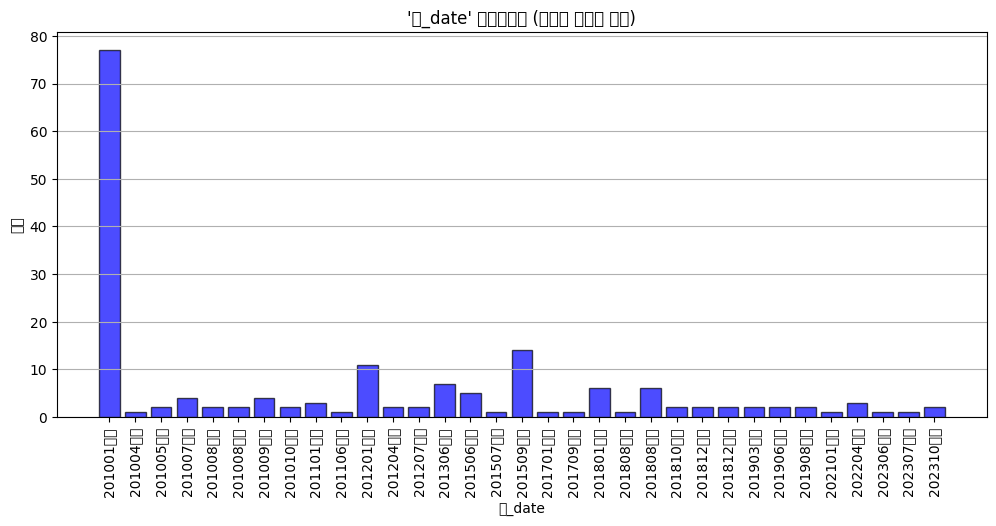

c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47561 (\N{HANGUL SYLLABLE MAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


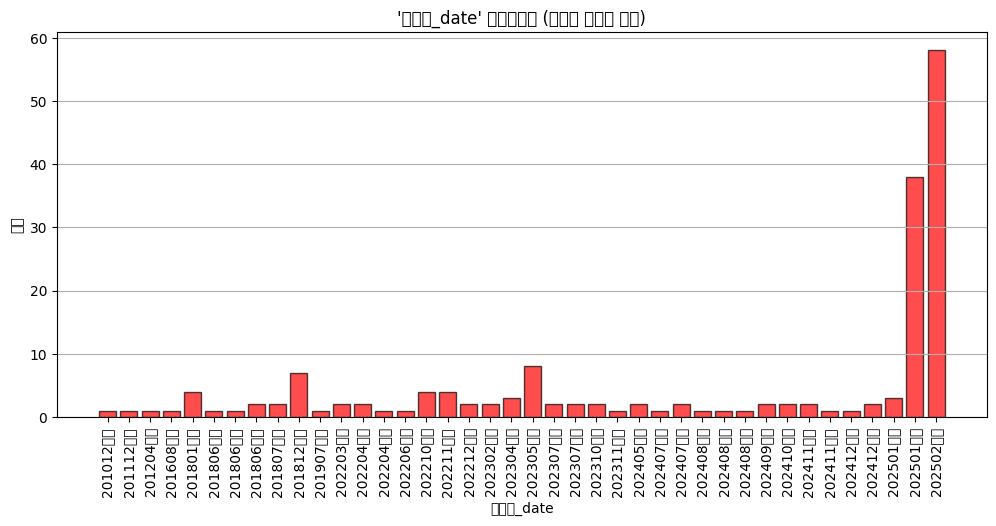

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
grouped_df = grouped_df[grouped_df['count'] >= 36]
# '첫_date'와 '마지막_date'의 고유한 날짜를 문자열 기준으로 정렬
sorted_dates_첫 = sorted(grouped_df['첫_date'].astype(str).unique())
sorted_dates_마지막 = sorted(grouped_df['마지막_date'].astype(str).unique())

# 첫_date 빈도수 계산
첫_date_counts = grouped_df['첫_date'].astype(str).value_counts().reindex(sorted_dates_첫, fill_value=0)

# 마지막_date 빈도수 계산
마지막_date_counts = grouped_df['마지막_date'].astype(str).value_counts().reindex(sorted_dates_마지막, fill_value=0)

# 첫_date 히스토그램 (사전순 정렬)
plt.figure(figsize=(12, 5))
plt.bar(첫_date_counts.index, 첫_date_counts.values, color='blue', alpha=0.7, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('첫_date')
plt.ylabel('빈도')
plt.title("'첫_date' 히스토그램 (문자열 사전순 정렬)")
plt.grid(axis='y')
plt.show()

# 마지막_date 히스토그램 (사전순 정렬)
plt.figure(figsize=(12, 5))
plt.bar(마지막_date_counts.index, 마지막_date_counts.values, color='red', alpha=0.7, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('마지막_date')
plt.ylabel('빈도')
plt.title("'마지막_date' 히스토그램 (문자열 사전순 정렬)")
plt.grid(axis='y')
plt.show()


c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\my_code\ais\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


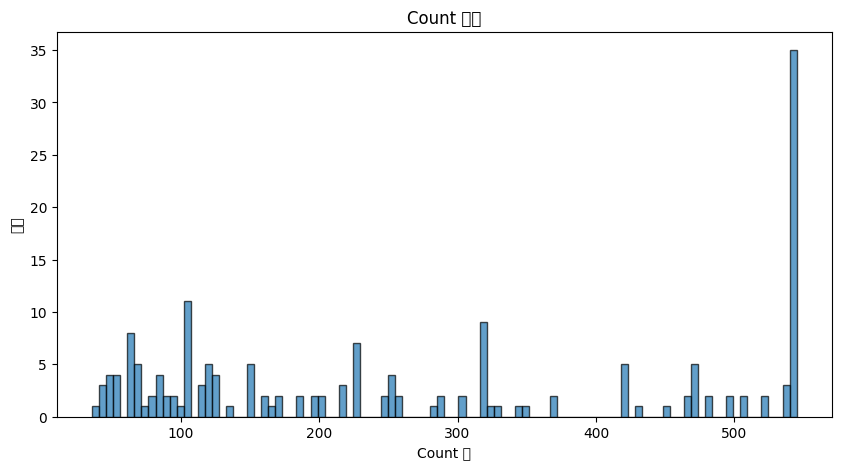

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(grouped_df['count'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Count 값')
plt.ylabel('빈도')
plt.title('Count 분포')
plt.show()


In [10]:
grouped_df = grouped_df[grouped_df['count'] >= 72]
grouped_df = grouped_df[~grouped_df['마지막_date'].astype(str).str.startswith('201')]
#grouped_df = grouped_df[grouped_df['등급'] != '중품']


grouped_df = grouped_df.reset_index(drop=True)
unique_counts = grouped_df.nunique()
print(unique_counts)

품목          53
품종          63
거래단위        19
등급           5
count       59
첫_date      23
마지막_date    24
dtype: int64


In [11]:
filtered_df = merged_df.merge(grouped_df[['품목', '품종', '거래단위', '등급']].drop_duplicates(),
                              on=['품목', '품종', '거래단위', '등급'],
                              how='inner')
unique_counts = filtered_df.nunique()
print(unique_counts)

DATE      545
품목         53
품종         63
거래단위       19
등급          5
평균가격    22395
전년      20853
평년      29067
dtype: int64


In [12]:
filtered_df


,DATE,품목,품종,거래단위,등급,평균가격,전년,평년
0,202502중순,녹두,국산,40kg,상품,13.240146,524125.0,583722.333333
1,202502중순,녹두,국산,40kg,중품,13.074223,NaN,NaN
2,202502중순,녹두,수입,40kg,중품,12.278393,229600.0,225172.333333
3,202502상순,녹두,국산,40kg,상품,13.237120,521417.0,584285.000000
4,202502상순,녹두,국산,40kg,중품,13.074223,NaN,NaN
...,...,...,...,...,...,...,...,...
43796,202501상순,고구마,밤,10kg,중품,10.192082,27869.0,26935.333333
43797,202501중순,고구마,밤,10kg,상품,10.451407,35077.0,32180.000000
43798,202501중순,고구마,밤,10kg,중품,10.203111,28900.0,26767.666667
43799,202501하순,고구마,밤,10kg,상품,10.451378,34033.0,31668.000000


In [13]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'c:/Windows/Fonts/NANUMGOTHIC.TTF '  # 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12)
# 한글 폰트 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'

# 경고 메시지 제거
plt.rcParams['axes.unicode_minus'] = False

# X축(DATE) 값 통일을 위해 모든 DATE 값 가져오기 (오름차순 정렬)
unique_dates = sorted(filtered_df['DATE'].unique())

# 품목, 품종, 거래단위, 등급 별로 그룹화
grouped = filtered_df.groupby(['품목', '품종', '거래단위', '등급'])
num=1
# 결과 저장용 리스트 초기화
results = []
'''
# 그래프 그리기 및 결과 계산
for (품목, 품종, 거래단위, 등급), group in grouped:
    plt.figure(figsize=(50, 5))  # 그래프 크기 조정
    print(num, 품목, 품종, 거래단위, 등급)
    
    # 기존 코드: DATE 오름차순 정렬 및 전체 날짜(unique_dates)로 재배열
    group = group.set_index('DATE').reindex(unique_dates).reset_index()
    
    # 이웃 결측치 처리: 각 행의 앞뒤 3개(총 6개) 이웃에서 결측치가 4개 이상이면 해당 행의 '평균가격'을 NaN으로 변경
    updated_prices = group['평균가격'].copy()
    for i in range(len(updated_prices)):
        start = max(0, i - 3)
        end = min(len(updated_prices) - 1, i + 3)
        # 자기 자신 제외한 이웃 값들
        neighbors = updated_prices.iloc[start:i].tolist() + updated_prices.iloc[i+1:end+1].tolist()
        missing_neighbors = sum(pd.isna(x) for x in neighbors)
        if missing_neighbors >= 4:
            updated_prices.iloc[i] = np.nan
    group['평균가격'] = updated_prices

    # 결측치 처리 후, 유효한 '평균가격'이 있는 날짜들을 기준으로 첫 출현 날짜와 마지막 출현 날짜 계산
    valid_dates = group.loc[~group['평균가격'].isna(), 'DATE']
    if len(valid_dates) > 0:
        valid_first_date = valid_dates.min()
        valid_last_date = valid_dates.max()
    else:
        valid_first_date = group['DATE'].min()
        valid_last_date = group['DATE'].max()
    
    # 유효 데이터가 존재하는 기간(유효 날짜 기준)만 필터링
    period_group = group[(group['DATE'] >= valid_first_date) & (group['DATE'] <= valid_last_date)]
    
    # '평균가격' 결측값 개수 및 해당 기간 내 전체 날짜 수 계산 (분모는 유효 기간의 날짜 수)
    missing_count = period_group['평균가격'].isna().sum()
    total_period = len(period_group)
    missing_ratio = (missing_count / total_period) * 100 if total_period > 0 else 0
    
    # 결과 출력
    print(f"  - 기간 (유효 데이터 기준): {valid_first_date} ~ {valid_last_date}")
    print(f"  - '평균가격' 결측값 개수: {missing_count}")
    print(f"  - 기간 내 전체 날짜 수: {total_period}")
    print(f"  - 결측 비율: {missing_ratio:.2f}%\n")
    
    # 결과를 리스트에 저장
    results.append({
        '품목': 품목,
        '품종': 품종,
        '거래단위': 거래단위,
        '등급': 등급,
        '유효시작날짜': valid_first_date,
        '유효종료날짜': valid_last_date,
        '결측값개수': missing_count,
        '기간내전체날짜수': total_period,
        '결측비율(%)': missing_ratio
    })
    
    # 그래프 그리기 (X축: 통일된 DATE, Y축: 평균가격)
    plt.plot(group['DATE'], group['평균가격'], marker='o', linestyle='-')
    plt.title(f'{품목} - {품종} - {거래단위} - {등급}')
    plt.xlabel('DATE')
    plt.ylabel('평균가격')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()
    
    num += 1
'''
# 결과 리스트를 DataFrame으로 변환 후 CSV 파일로 저장 (인덱스 없이)
result_df = pd.DataFrame(results)
result_df
result_df.to_csv("output_missing_ratio.csv", index=False)


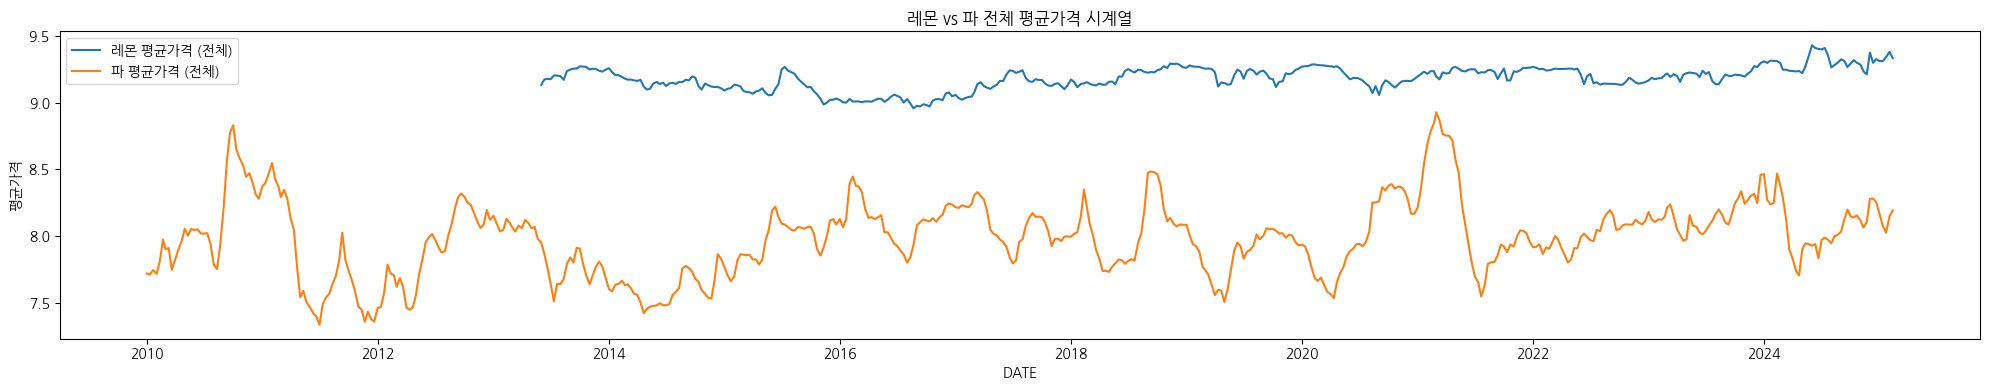

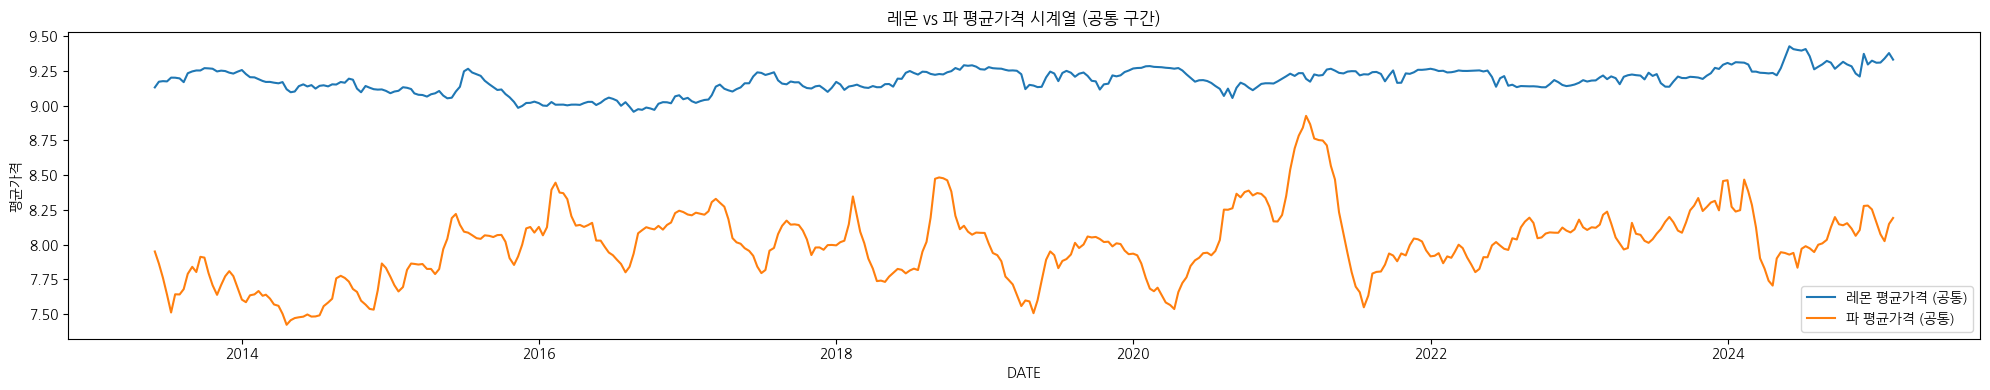

c:\my_code\ais\.venv\Lib\site-packages\pywt\_cwt.py:113: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


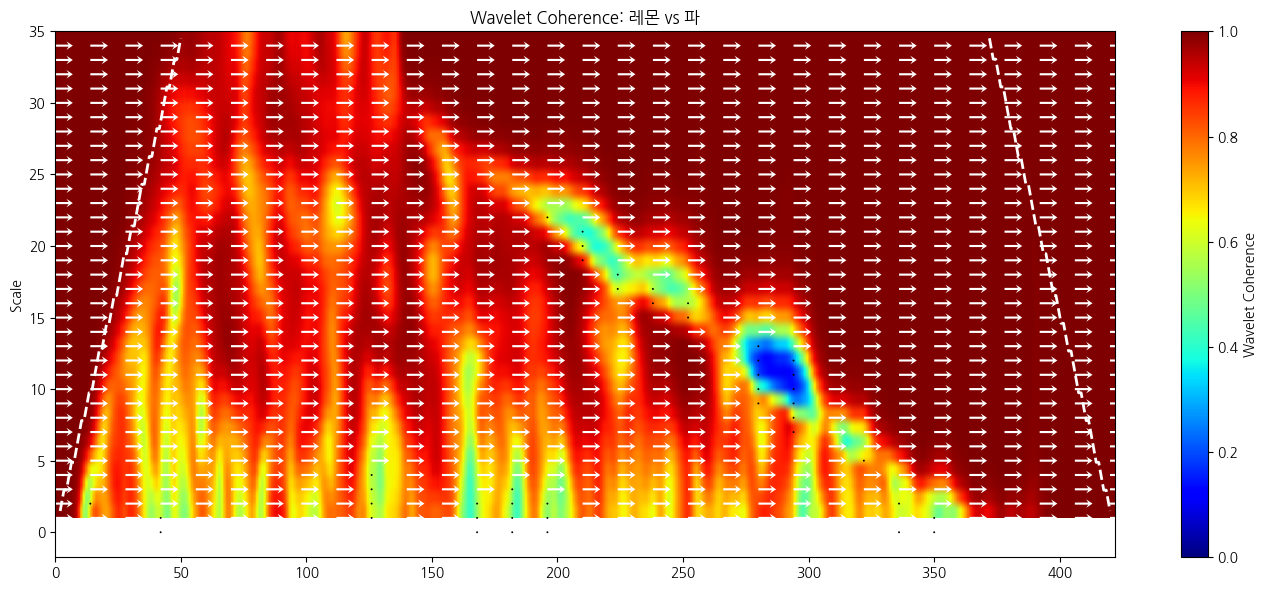

In [14]:
# 필요한 라이브러리 import
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import pandas as pd
df = filtered_df.copy()
# -----------------------------
# 1. DATE 파싱 함수
# -----------------------------
def parse_custom_date(val):
    # 이미 Timestamp 타입이면 그대로 반환
    if isinstance(val, pd.Timestamp):
        return val
    if not isinstance(val, str):
        raise TypeError(f"parse_custom_date expects str or pd.Timestamp, got {type(val)}")
    year = int(val[:4])
    month = int(val[4:6])
    period = val[6:]
    if period == "상순":
        day = 1
    elif period == "중순":
        day = 11
    elif period == "하순":
        day = 21
    else:
        raise ValueError(f"Unknown period: {period}")
    return pd.Timestamp(year, month, day)

# DATE 컬럼 변환
if df['DATE'].dtype == 'O' or df['DATE'].dtype == 'string':
    df['DATE'] = df['DATE'].apply(parse_custom_date)
else:
    df['DATE'] = df['DATE'].apply(parse_custom_date)

# -----------------------------
# 2. 웨이블릿 관련 함수
# -----------------------------
def smooth_mat(mat, sigma_time=2, sigma_scale=2):
    return nd.gaussian_filter(np.abs(mat), sigma=(sigma_scale, sigma_time))

def wavelet_coherence_and_phase(x, y, wavelet='cmor', max_scale=36):
    if len(x) < 2 or len(y) < 2:
        raise ValueError("시계열 데이터의 길이가 2 미만입니다.")
    if np.any(np.isnan(x)) or np.any(np.isnan(y)):
        raise ValueError("시계열 데이터에 NaN이 포함되어 있습니다.")
    scales = np.arange(1, max_scale)
    Wx, _ = pywt.cwt(x, scales, wavelet)
    Wy, _ = pywt.cwt(y, scales, wavelet)
    Wxy = Wx * np.conj(Wy)
    Sxx = smooth_mat(np.abs(Wx) ** 2)
    Syy = smooth_mat(np.abs(Wy) ** 2)
    Sxy = smooth_mat(Wxy)
    coh = (np.abs(Sxy) ** 2) / (Sxx * Syy + 1e-10)
    phase = np.angle(Sxy)
    return coh, phase, scales

def cone_of_influence(length, scales, dt=1):
    coi = 1.414 * scales
    t = np.arange(length)
    coi_curve = np.minimum(t, length - 1 - t)
    coi_matrix = np.zeros((len(scales), length), dtype=bool)
    for i, scale in enumerate(scales):
        coi_matrix[i, :] = coi_curve >= coi[i]
    return coi_matrix

# -----------------------------
# 3. 품목별 결측치 가장 적은 조합 선택
# -----------------------------
def get_min_missing_per_item(df):
    group_cols = ['품목', '품종', '거래단위', '등급']
    full_dates = pd.date_range(df['DATE'].min(), df['DATE'].max(), freq='D')
    missing_list = []
    for keys, sub in df.groupby(group_cols):
        sub = sub.set_index('DATE').reindex(full_dates)
        n_missing = sub['평균가격'].isna().sum()
        missing_list.append(keys + (n_missing,))
    missing_df = pd.DataFrame(missing_list, columns=group_cols + ['결측치개수'])
    idx = missing_df.groupby('품목')['결측치개수'].idxmin()
    return missing_df.loc[idx].reset_index(drop=True)

min_missing_items = get_min_missing_per_item(df)
'''
print("분석 가능한 품목 목록:")
for i, row in min_missing_items.iterrows():
    print(f"{i}: {row['품목']} (품종: {row['품종']}, 거래단위: {row['거래단위']}, 등급: {row['등급']}, 결측치: {row['결측치개수']})")
'''
# -----------------------------
# 4. 분석할 두 품목 선택
# -----------------------------
item1_idx = 15  # 원하는 index
item2_idx = 43

item1 = min_missing_items.iloc[item1_idx].to_dict()
item2 = min_missing_items.iloc[item2_idx].to_dict()

def get_series(df, item):
    cond = (
        (df['품목'] == item['품목']) &
        (df['품종'] == item['품종']) &
        (df['거래단위'] == item['거래단위']) &
        (df['등급'] == item['등급'])
    )
    sub = df[cond].sort_values('DATE')
    return sub['DATE'].values, sub['평균가격'].values

date1, s1 = get_series(df, item1)
date2, s2 = get_series(df, item2)

# -----------------------------
# 5. 전체 구간 시계열 출력
# -----------------------------
all_dates = np.union1d(date1, date2)
s1_all = pd.Series(s1, index=date1).reindex(all_dates)
s2_all = pd.Series(s2, index=date2).reindex(all_dates)

plt.figure(figsize=(20, 4))
plt.plot(all_dates, s1_all, label=f"{item1['품목']} 평균가격 (전체)")
plt.plot(all_dates, s2_all, label=f"{item2['품목']} 평균가격 (전체)")
plt.title(f"{item1['품목']} vs {item2['품목']} 전체 평균가격 시계열")
plt.xlabel('DATE')
plt.ylabel('평균가격')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 6. 공통 구간 시계열 출력
# -----------------------------
common_dates = np.intersect1d(date1, date2)
common_dates.sort()

if len(common_dates) > 0:
    s1_common = pd.Series(s1, index=date1).reindex(common_dates).values
    s2_common = pd.Series(s2, index=date2).reindex(common_dates).values

    plt.figure(figsize=(20, 4))
    plt.plot(common_dates, s1_common, label=f"{item1['품목']} 평균가격 (공통)")
    plt.plot(common_dates, s2_common, label=f"{item2['품목']} 평균가격 (공통)")
    plt.title(f"{item1['품목']} vs {item2['품목']} 평균가격 시계열 (공통 구간)")
    plt.xlabel('DATE')
    plt.ylabel('평균가격')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # 7. 웨이블릿 코히런스 분석
    # -----------------------------
    mask = ~np.isnan(s1_common) & ~np.isnan(s2_common)
    s1_common = s1_common[mask]
    s2_common = s2_common[mask]
    common_dates = np.array(common_dates)[mask]

    coh, phase, scales = wavelet_coherence_and_phase(s1_common, s2_common)
    coi_mask = cone_of_influence(len(common_dates), scales)

    plt.figure(figsize=(14, 6))
    im = plt.imshow(coh, aspect='auto', cmap='jet',
                    extent=[0, len(common_dates), scales[0], scales[-1]],
                    origin='lower', vmin=0, vmax=1)
    plt.colorbar(label='Wavelet Coherence')
    plt.title(f"Wavelet Coherence: {item1['품목']} vs {item2['품목']}")
    plt.ylabel('Scale')

    # COI 표시
    yy, xx = np.meshgrid(scales, np.arange(len(common_dates)), indexing='ij')
    plt.contour(~coi_mask, levels=[0.5], colors='w', linewidths=2, linestyles='dashed',
                extent=[0, len(common_dates), scales[0], scales[-1]], origin='lower')

    # 위상 화살표
    arrow_step_x = max(1, len(common_dates) // 30)
    arrow_step_y = max(1, len(scales) // 20)
    Y, X = np.mgrid[0:coh.shape[0]:arrow_step_y, 0:coh.shape[1]:arrow_step_x]
    phase_sub = phase[Y, X]
    coh_sub = coh[Y, X]
    mask_arrow = coh_sub > 0.6
    U = np.cos(phase_sub) * mask_arrow
    V = np.sin(phase_sub) * mask_arrow
    plt.quiver(X, Y, U, V, mask_arrow, cmap='gray',
               scale=60, headwidth=4, headlength=3, headaxislength=2, width=0.002)

    plt.tight_layout()
    plt.show()
else:
    print("공통 구간이 없습니다. 분석 불가.")


c:\my_code\ais\.venv\Lib\site-packages\pywt\_cwt.py:113: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


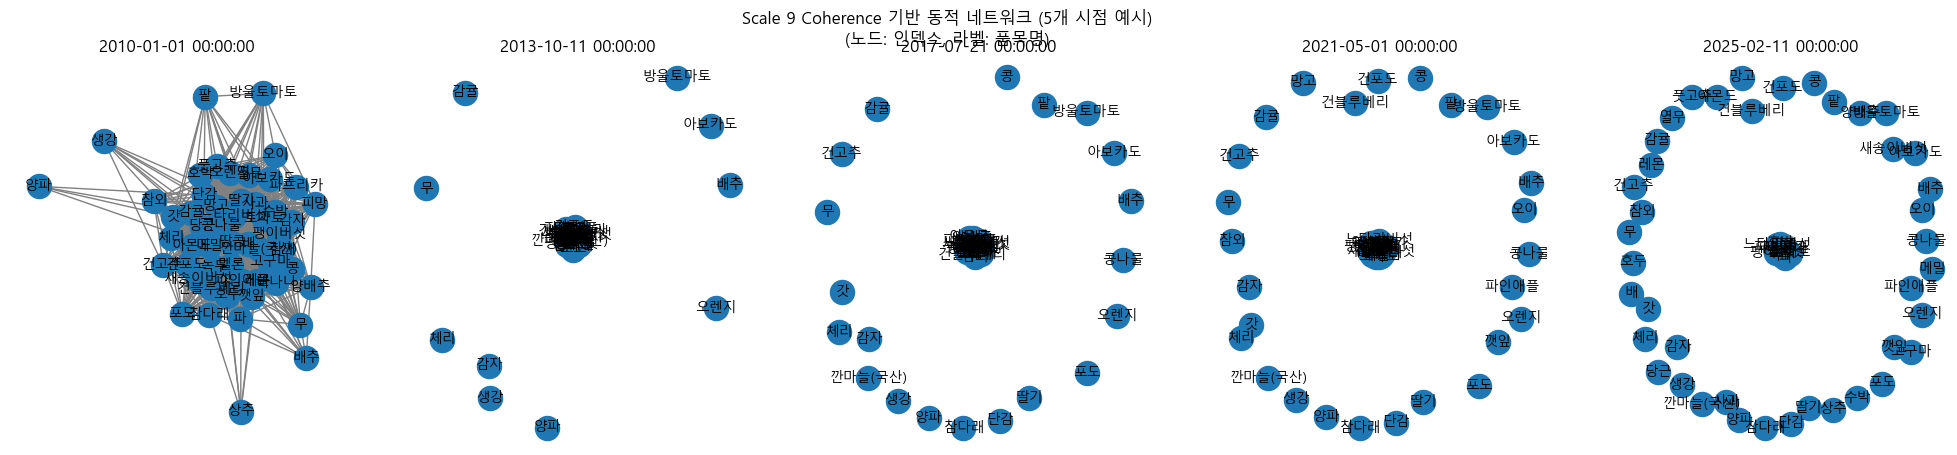

545
최종 대표 커뮤니티 그룹:

커뮤니티 10 (노드 수: 4)
   ('녹두', '국산', '40kg', '상품')
   ('참깨', '백색(국산)', '30kg', '상품')
   ('파', '대파', '1kg', '상품')
   ('당근', '무세척', '20kg', '상품')

커뮤니티 5 (노드 수: 10)
   ('호박', '애호박', '1개', '상품')
   ('풋고추', '꽈리고추', '4kg', '상품')
   ('느타리버섯', '느타리버섯', '2kg', '상품')
   ('파프리카', '파프리카', '5kg', '중품')
   ('상추', '적', '4kg', '상품')
   ('배', '신고', '15kg', '상품')
   ('팽이버섯', '팽이버섯', '5kg', '상품')
   ('멜론', '멜론', '1개', '상품')
   ('토마토', '토마토', '1kg', '상품')
   ('피망', '청', '10kg', '상품')

커뮤니티 2 (노드 수: 1)
   ('깐마늘(국산)', '깐마늘(남도)', '20kg', '상품')

커뮤니티 3 (노드 수: 1)
   ('감귤', '노지', '5kg', 'M과')

커뮤니티 4 (노드 수: 1)
   ('팥', '붉은 팥(국산)', '40kg', '상품')

커뮤니티 6 (노드 수: 1)
   ('바나나', '수입', '13kg', '중품')

커뮤니티 7 (노드 수: 1)
   ('생강', '국산', '10kg', '중품')

커뮤니티 8 (노드 수: 2)
   ('땅콩', '국산', '30kg', '상품')
   ('고구마', '밤', '10kg', '상품')

커뮤니티 9 (노드 수: 1)
   ('딸기', '딸기', '2kg', '상품')

커뮤니티 11 (노드 수: 1)
   ('갓', '갓', '1kg', '상품')

커뮤니티 23 (노드 수: 2)
   ('건포도', '수입', '100g', '중품')
   ('건블루베리', '수입', '100g', '중품')

커뮤니

In [62]:
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (예: 맑은 고딕)
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 1. 품목별 대표 1개 조합 (예: 첫 번째 행)만 뽑기
item_keys = (
    df[['품목', '품종', '거래단위', '등급']]
    .drop_duplicates()
    .groupby('품목')
    .head(1)                # 각 품목에서 1개만
    .reset_index(drop=True)
    .head(60)               # 품목 10개만
)

# 2. 튜플 리스트로 변환
item_list = [tuple(row) for row in item_keys.values]

# 3. 매핑 딕셔너리
item_idx_dict = {item: idx for idx, item in enumerate(item_list)}
idx_item_dict = {idx: item for idx, item in enumerate(item_list)}

# 2. 각 조합별 평균가격 시계열 추출 (공통 날짜로 정렬)
date_set = sorted(df['DATE'].unique())
item_price_dict = {}
for item in item_list:
    sub = df[(df['품목'] == item[0]) & (df['품종'] == item[1]) & (df['거래단위'] == item[2]) & (df['등급'] == item[3])]
    sub = sub.set_index('DATE').reindex(date_set)
    item_price_dict[item] = sub['평균가격'].values.astype(float)

# 3. 모든 쌍에 대해 wavelet coherence 계산 (scale=9에서)
def get_coherence_at_scale(s1, s2, scale_idx=0):  # scale=9는 인덱스 8
    mask = ~np.isnan(s1) & ~np.isnan(s2)
    if np.sum(mask) < 20:
        return None  # 데이터가 너무 적으면 제외
    s1c, s2c = s1[mask], s2[mask]
    coh, phase, scales = wavelet_coherence_and_phase(s1c, s2c)
    if scale_idx >= coh.shape[0]:
        return None
    return coh[scale_idx, :]  # 시계열

# 4. 모든 쌍 coherence 시계열 계산
coh_dict = {}
for i, item1 in enumerate(item_list):
    for j, item2 in enumerate(item_list):
        if i < j:
            c = get_coherence_at_scale(item_price_dict[item1], item_price_dict[item2])
            if c is not None:
                coh_dict[(item1, item2)] = c

# 5. 네트워크 계산(모든 시점) 및 시각화(5개 시점만)
# 모든 시점에 대해 네트워크 생성 및 threshold 적용, 저장
network_list = []
for t_idx in range(len(date_set)):
    G = nx.Graph()
    for item in item_list:
        G.add_node(item_idx_dict[item])
    for (item1, item2), coh_ts in coh_dict.items():
        if t_idx < len(coh_ts) and not np.isnan(coh_ts[t_idx]):
            G.add_edge(item_idx_dict[item1], item_idx_dict[item2], weight=coh_ts[t_idx])
    # 엣지 강도에 따라 threshold 적용 (상위 10%만)
    weights = [d['weight']**2 for u, v, d in G.edges(data=True)]
    if len(weights) == 0:
        network_list.append(G)
        continue
    threshold = np.percentile(weights, 50)
    edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < threshold]
    G.remove_edges_from(edges_to_remove)
    network_list.append(G)

# 5-1. 네트워크 시각화 (5개 시점만)
time_idx_list = np.linspace(0, len(date_set)-1, 5, dtype=int)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for k, t_idx in enumerate(time_idx_list):
    G = network_list[t_idx]
    if G.number_of_edges() == 0:
        continue
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, node_size=300, ax=axes[k], with_labels=True,
        labels={idx: idx_item_dict[idx][0] for idx in G.nodes()},
        edge_color='gray', font_size=10, font_family='Malgun Gothic'
    )
    axes[k].set_title(f"{date_set[t_idx]}", fontname='Malgun Gothic')
plt.suptitle("Scale 9 Coherence 기반 동적 네트워크 (5개 시점 예시)\n(노드: 인덱스, 라벨: 품목명)", fontname='Malgun Gothic')
plt.show()

# 6. 각 시점별 커뮤니티 탐지 (Louvain, 없으면 greedy modularity)
try:
    import community as community_louvain
    def detect_communities(G):
        return community_louvain.best_partition(G, weight='weight')
except ImportError:
    def detect_communities(G):
        from networkx.algorithms.community import greedy_modularity_communities
        comms = list(greedy_modularity_communities(G, weight='weight'))
        part = {}
        for i, comm in enumerate(comms):
            for node in comm:
                part[node] = i
        return part

# 7. 전 기간 커뮤니티 추적 (모든 시점)
community_time = []
print(len(network_list))
for t_idx, G in enumerate(network_list):
    if G.number_of_edges() == 0:
        community_time.append({})
        continue
    part = detect_communities(G)
    community_time.append(part)

# 8. 전 기간 공동소속(co-membership) 기반 네트워크 구축
import itertools

co_count = defaultdict(int)
co_total = defaultdict(int)

for part in community_time:
    if not part:
        continue
    comm_to_nodes = defaultdict(list)
    for node, comm in part.items():
        comm_to_nodes[comm].append(node)
    for nodes in comm_to_nodes.values():
        for u, v in itertools.combinations(sorted(nodes), 2):
            co_count[(u, v)] += 1
    all_nodes = list(part.keys())
    for u, v in itertools.combinations(sorted(all_nodes), 2):
        co_total[(u, v)] += 1

# 공동소속 비율 기반 네트워크
G_stable = nx.Graph()
# community_time 안에서 실제 사용된 node 키 타입에 맞게 추가
all_nodes_seen = set()
for part in community_time:
    all_nodes_seen.update(part.keys())
G_stable.add_nodes_from(all_nodes_seen)

for (u, v), cnt in co_count.items():
    denom = co_total[(u, v)]
    if denom > 0:
        w = cnt / denom
        if w >= 0.5:  # threshold 조정 가능
            G_stable.add_edge(u, v, weight=w)

# 9. 안정적 커뮤니티 탐지
part_final = detect_communities(G_stable)

# 결과 정리 및 출력
comm_groups = defaultdict(list)
for node, cid in part_final.items():
    # node가 int이면 idx_item_dict로 매핑, 아니면 그대로 사용
    if node in idx_item_dict:
        comm_groups[cid].append(idx_item_dict[node])
    else:
        comm_groups[cid].append(node)

print("최종 대표 커뮤니티 그룹:")
for cid, members in comm_groups.items():
    print(f"\n커뮤니티 {cid} (노드 수: {len(members)})")
    for m in members[:10]:
        print("  ", m)
    if len(members) > 10:
        print("  ...")



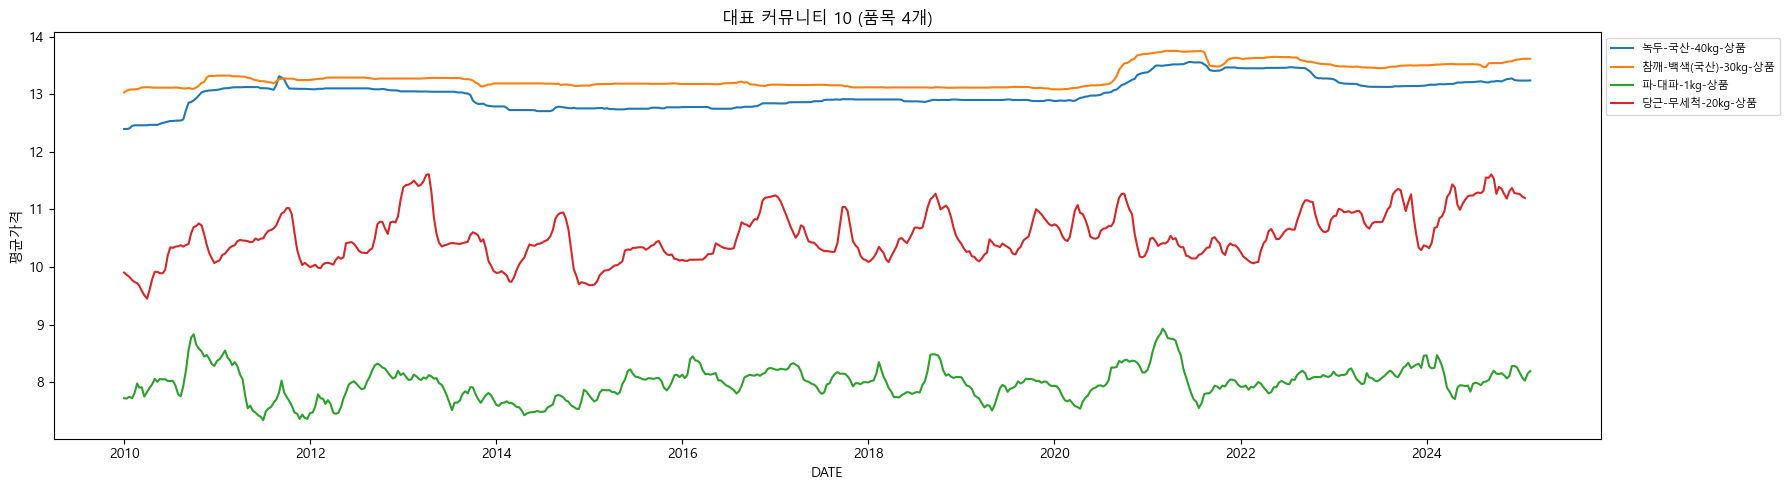

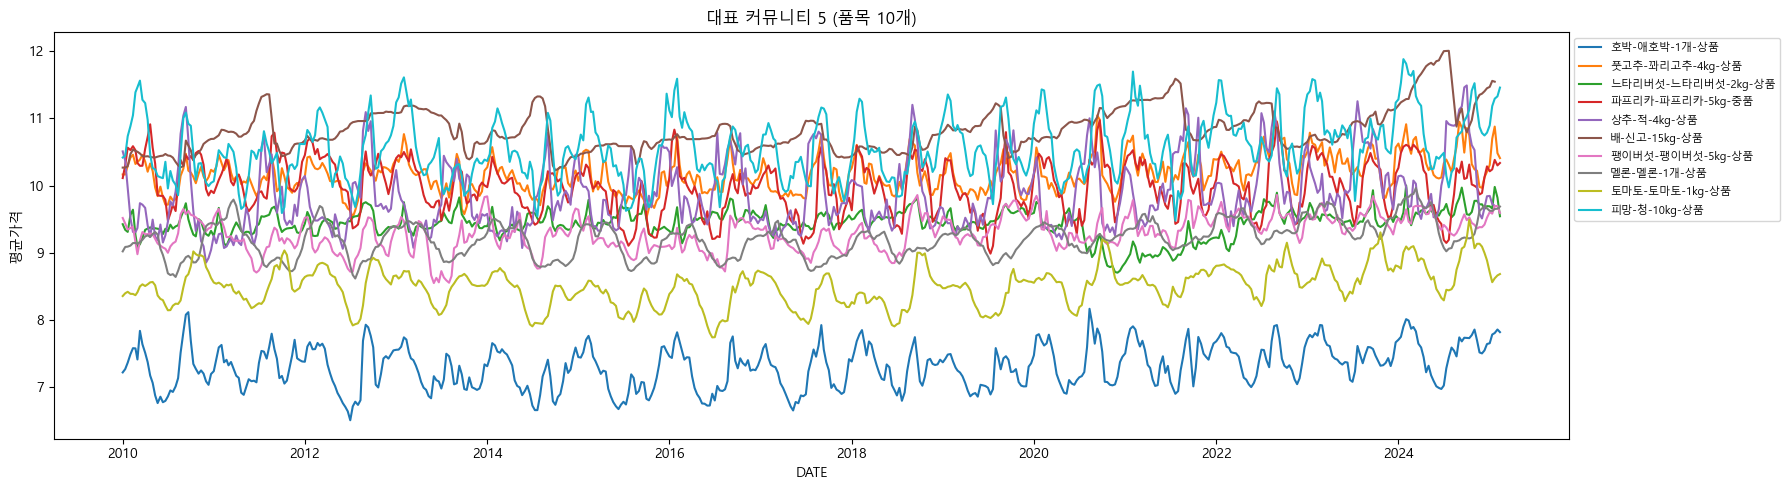

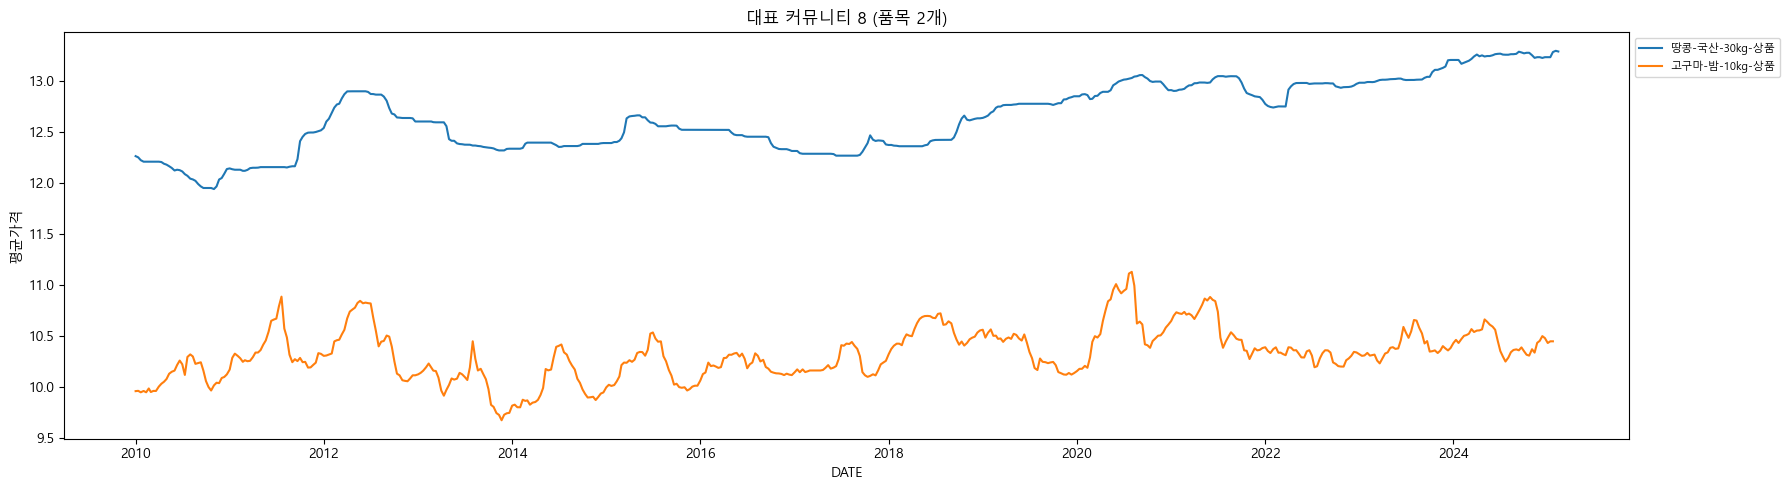

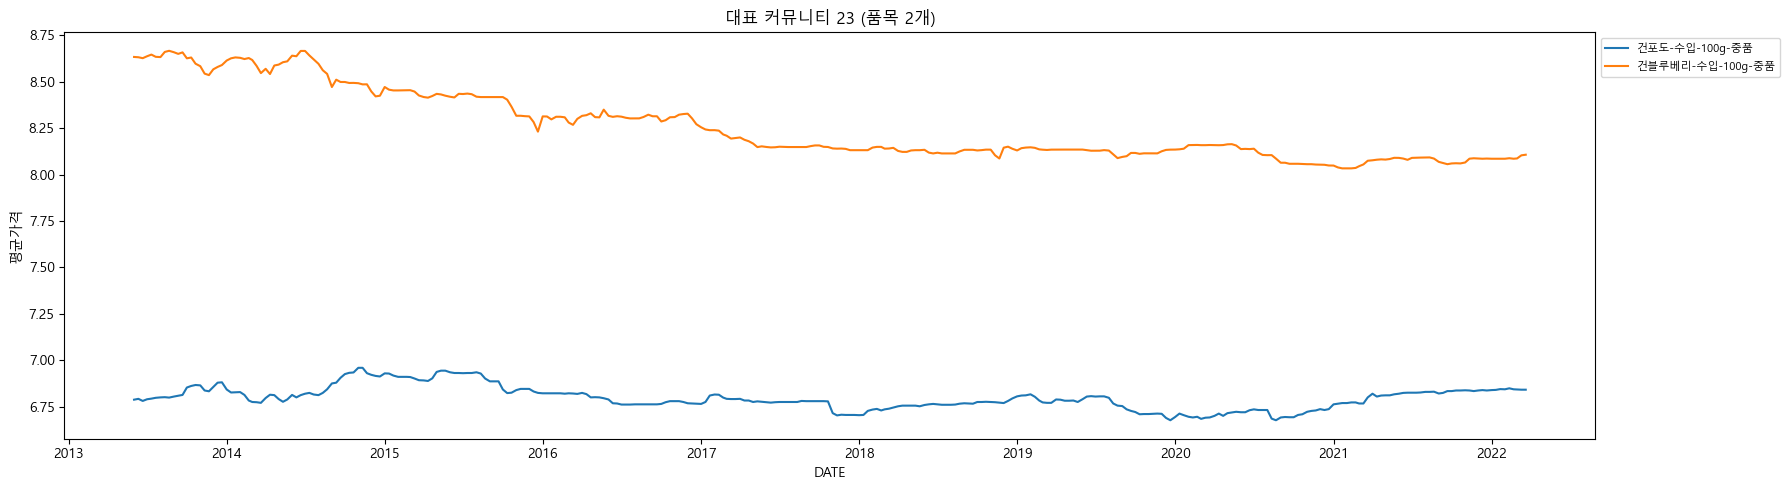

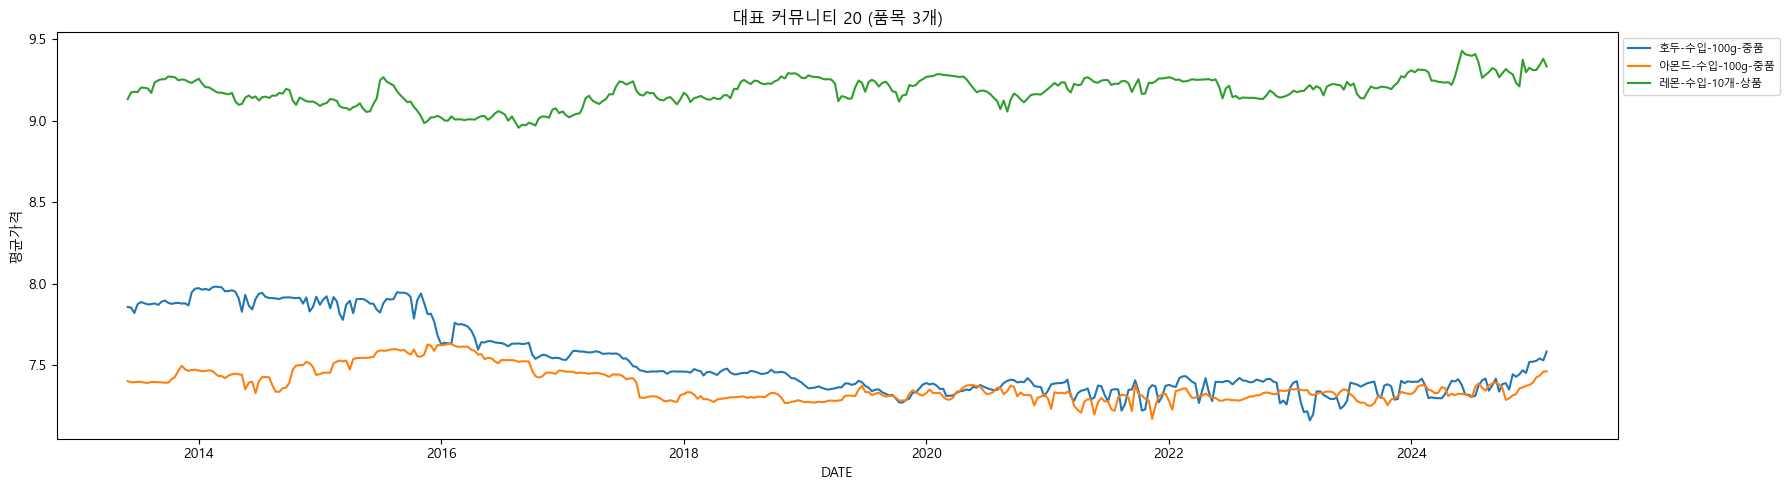

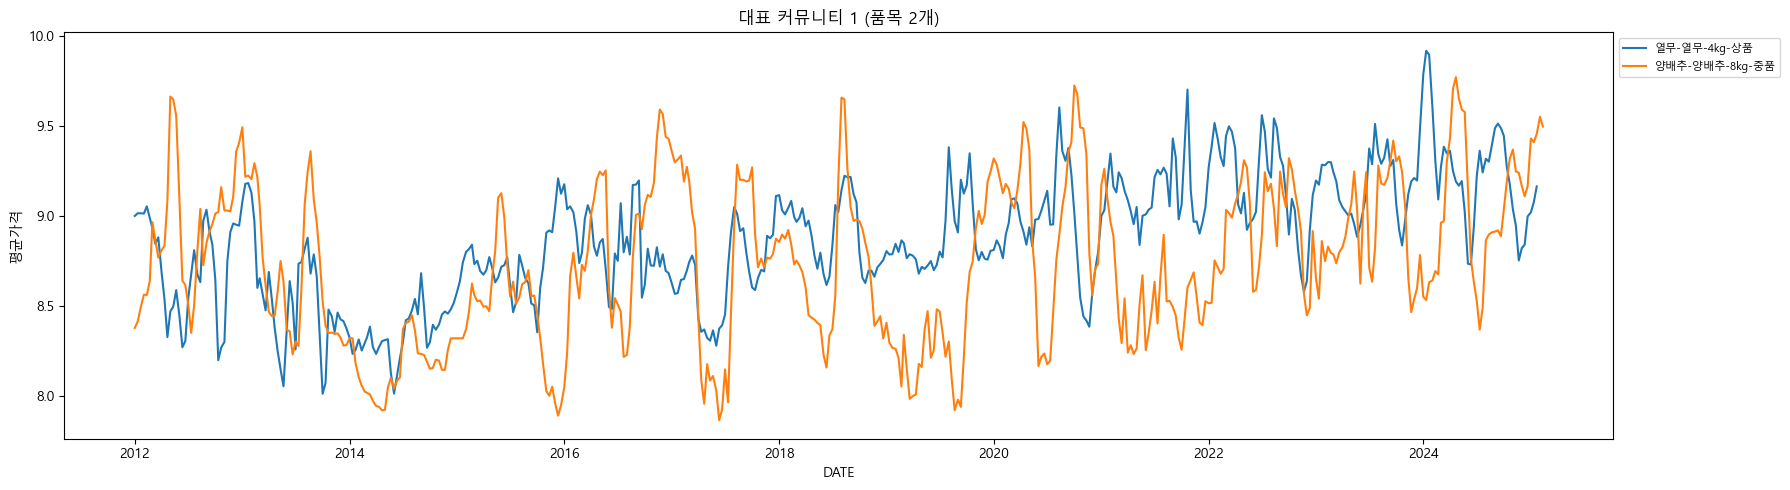

In [63]:
import matplotlib.pyplot as plt

# comm_groups: {community_id: [ (품목, 품종, 거래단위, 등급), ... ] }
# idx_item_dict, df, date_set 이 이미 정의되어 있다고 가정

# 커뮤니티별로 시계열 그래프 그리기 (멤버 2개 이상만)
for comm_id, members in comm_groups.items():
    if len(members) < 2:
        continue  # 싱글톤은 제외

    plt.figure(figsize=(18, 5))
    for item_info in members:
        # 해당 품목, 품종, 거래단위, 등급에 해당하는 데이터 추출
        cond = (
            (df['품목'] == item_info[0]) &
            (df['품종'] == item_info[1]) &
            (df['거래단위'] == item_info[2]) &
            (df['등급'] == item_info[3])
        )
        item_df = df[cond].sort_values('DATE')
        if item_df.empty:
            continue
        plt.plot(
            item_df['DATE'], item_df['평균가격'],
            label=f"{item_info[0]}-{item_info[1]}-{item_info[2]}-{item_info[3]}"
        )

    plt.title(f"대표 커뮤니티 {comm_id} (품목 {len(members)}개)", fontname='Malgun Gothic')
    plt.xlabel("DATE", fontname='Malgun Gothic')
    plt.ylabel("평균가격", fontname='Malgun Gothic')
    plt.legend(fontsize=8, loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()
